<a href="https://colab.research.google.com/github/joaomxm/portfolio-datascience/blob/main/AnaliseDadosAirbnb_Melbourne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analisando dados do Airbnb
A análise de dados consiste em transformar informações aplicando diversas técnicas estatísticas e logicas para compreender melhor o cenário observado e tomar decisões mais assertivas. Nesse post, será abordado uma análise dos dados do Airbnb, mas o que seria isso?

O Airbnb é uma plataforma onde o usuário pode alugar acomodações de diversos tipos. É muito utilizado viajantes do mundo inteiro, sendo uma alternativa mais barata em relação a acomodações tradicionais.

A ideia surgiu em 2008 na Califórnia, quando dois amigos que tinham um espaço sobrando decidiram hospedar três pessoas. O nome surgiu devido o fato de que os viajantes procuravam um local para ficar com colchões infláveis e servir café da manhã, assim, Airbnb é a sigla para Air Bed & Breakfast.

Uma das iniciativas da empresa é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal Inside Airbnb, é possível baixar uma grande quantidade de dados para desenvolver projetos e análises.
Dataset do projeto: 

<img src='https://drive.google.com/uc?id=1Qz6StPRQk1Nevr5jOqWnE9FNz1Y62YWf'>


##Conhecendo Melbourne

Antes de iniciar a analise dos dados do Airbnb, vamos conhecer melhor a cidade de Melbourne.

Melbourne é a capital do estado de Victoria/Austrália e possui 5 milhões de habitantes. A cidade é considerada a capital cultural e das artes da Austrália. Localizada as margens do rio Yarra, Melbourne oferece diversas experiências e pontos turísticos como restaurantes, galerias (National Gallery of Victoria), museus, parques, montanhas, praias e eventos esportivos como o Grand Prix de Formula 1 e Austrália Open.
<img src='https://drive.google.com/uc?id=1L1hVy1l68-Y81Y_LvF84bMIU-d1LCpUt'>




##Instalações e imports

In [ ]:
!pip install folium


In [ ]:
#Importando pandas e criando um Dataframe
import pandas as pd
import seaborn as sns #Plotar graficos 
import matplotlib.pyplot as plt #Plotar graficos
import folium #plotar grafico Mapa

df_melbourne = pd.read_csv('airbnb_melbourne.csv')


#Análise dos Dados

Dicionário de variáveis.

Consiste na descrição de cada variável apresentada no conjunto de dados, para ter melhor entendimento sobre as informações.

* **id**: Identificador único da publicação;
* **name**: Nome da publicação;
* **host_id**: Identificador único do usuário/anfitrião;
* **host_name**: Nome do anfitrião;
* **neighbourhood_group**: Grupo do bairro;
* **neighbourhood**: Bairro;
* **latitude**: Latitude;
* **longitude**: Longitude;
* **room_type**: Tipo de quarto;
* **price**: Preço;
* **minimum_nights**: Noites minímas;
* **number_of_reviews**: Número de avaliações;
* **last_review**: Última avaliação;
* **reviews_per_month**: Avaliações por mês;
* **calculated_host_listings_count**: Número de imoveis que o anfitrião tem na região;
* **availability_365**: Disponibilidade em dias no ano;
* **number_of_reviews_ltm**: Numero de avaliações nos últimos 12 meses;
* **license**: Licença, autorização ou número de registro;



##Conhecendo melhor os dados
Para entender melhor os dados pode-se avaliar as informaçoes básicas do dataset.

###Visualizando as 5 primeiras linhas de dados


In [ ]:
df_melbourne.head()

id                                    name  host_id     host_name  \
0   9835                  Beautiful Room & House    33057         Manju   
1  12936  St Kilda 1BR+BEACHSIDE+BALCONY+WIFI+AC    50121  The A2C Team   
2  33111     Million Dollar Views Over Melbourne   143550          Paul   
3  38271      Melbourne - Old Trafford Apartment   164193   Daryl & Dee   
4  41836       CLOSE TO CITY & MELBOURNE AIRPORT   182833         Diana   

   neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0                  NaN    Manningham -37.77247  145.09232     Private room   
1                  NaN  Port Phillip -37.85999  144.97662  Entire home/apt   
2                  NaN     Melbourne -37.82163  144.96672     Private room   
3                  NaN         Casey -38.05725  145.33936  Entire home/apt   
4                  NaN       Darebin -37.69729  145.00082     Private room   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0     60               1                  4  2015-09-12               0.03   
1     95               3                 42  2020-03-15               0.30   
2   1000               1                  2  2012-01-27               0.02   
3    111               1                167  2021-11-27               1.24   
4     40               7                159  2018-08-22               1.18   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               1               365                      0   
1                              10                 0                      0   
2                               1               365                      0   
3                               1               288                     16   
4                               2                 0                      0   

   license  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN

###Entendendo a disposição dos dados, linhas/colunas





In [ ]:
df_melbourne.shape

(17834, 18)

###Tipo das variáveis disponíveis

In [ ]:
df_melbourne.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

###Valores ausentes

In [ ]:
valores_ausentes_total = df_melbourne.isnull().sum()
valores_ausentes_porcentagem = df_melbourne.isnull().sum() / df_melbourne.shape[0]


print('Valores Contagem total: ',valores_ausentes_total,sep='\n')
print('\n')
print('Valores em porcentagem %: [0,1] ',valores_ausentes_porcentagem,sep='\n')


Valores Contagem total: 
id                                    0
name                                  2
host_id                               0
host_name                             5
neighbourhood_group               17834
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        4213
reviews_per_month                  4213
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           17834
dtype: int64


Valores em porcentagem %: [0,1] 
id                                0.000000
name                              0.000112
host_id                           0.000000
host_name                         0.000280
neighbourhood_group               1

###Transformação de valores no dataset.

Com a visualização dos tipos dos dados das colunas, pode-se observar que algumas informações estão fora de padrão com o que é informado, por exemplo, a variável "last_review" esta com valores de texto onde seria mais simples e fácil de trabalhar se fosse do tipo date/datetime.

As variáveis **"neighbourhood_group"** e **"license"** estão com todos os valores do dataset em branco, null, assim podemos descartar essas variáveis reduzindo a dimensionalidade dos dados.


####Alterando o tipo das colunas

In [ ]:
df_melbourne['last_review'] = pd.to_datetime(df_melbourne['last_review'])
df_melbourne.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                      float64
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
number_of_reviews_ltm                      int64
license                                  float64
dtype: object

###Distribuição das variáveis

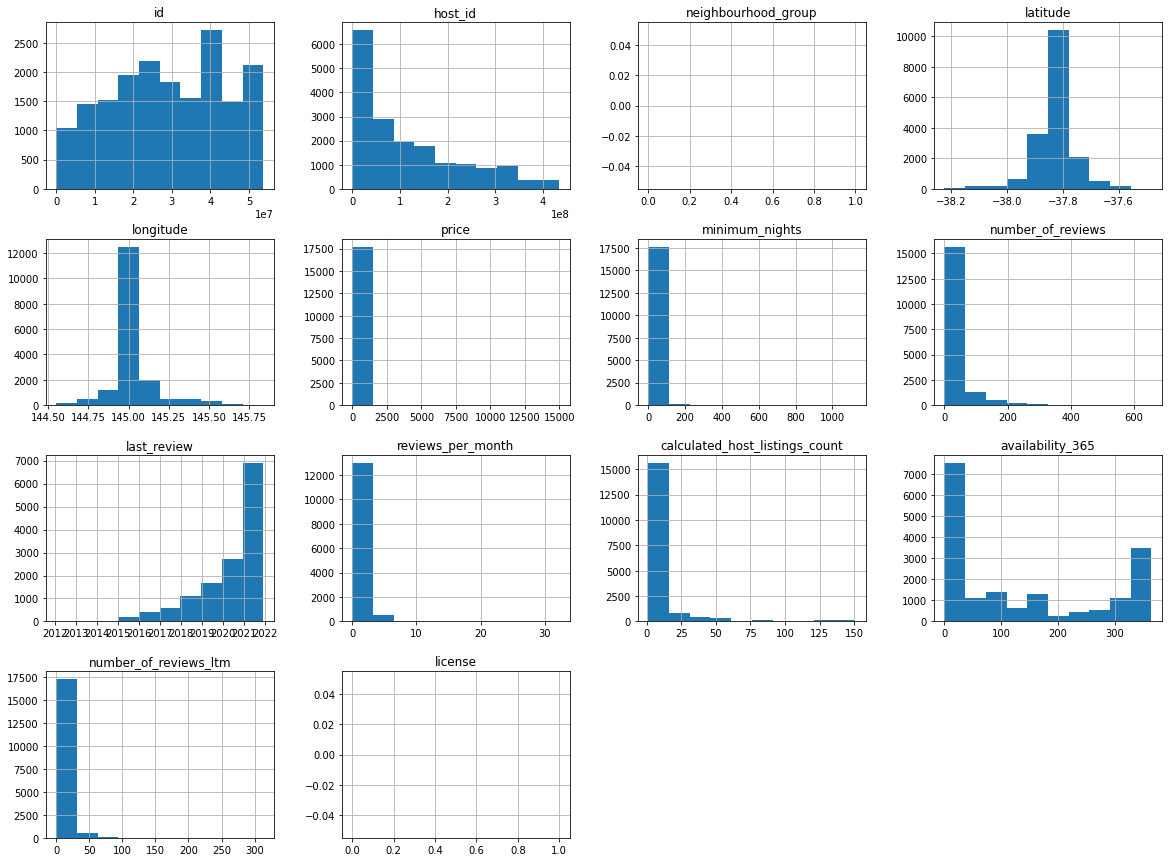

In [ ]:
df_melbourne.hist(figsize=(20,15));


####Analisando os histogramas.

A partir dos histogramas, podemos realizar algumas observações, tais como, as variáveis `neighbourhood_group` e `license` não possuem nenhum registro, as propriedades ficam mais disponíveis de 1 a 40 dias no ano e cerca de 3000 mil ficam quase o ano inteiro. Também é possível observar presença de valores altos comparado com a maioria dos dados, possíveis *outliers*, por exemplo,`price` apresenta um valor de 15000 e `minimum_nights` um valor maior que 1000 noites.

Para investigar melhor cada uma das variáveis, podemos utilizar funções estatísticas ou analisar o boxplot de cada uma.

#####Utilizando resumo estatistico

Na variável ***`price`***, temos uma média de 182.76 dólares por propriedade e 75% dos dados estão abaixo dos 194 dólares e o valor máximo é de 15 mil dólares.

Para a variável ***`minimum_nights`*** 75% das propriedades possuem o mínimo de 3 noites e a média de 7 noites, porém o seu valor máximo é muito alto, 1125 noites mínimas, cerca de 3 anos.






In [ ]:
df_melbourne[['price','minimum_nights']].describe()

price  minimum_nights
count  17834.000000    17834.000000
mean     182.764383        7.006561
std      425.270696       35.055845
min        0.000000        1.000000
25%       71.000000        1.000000
50%      120.000000        2.000000
75%      193.000000        3.000000
max    15000.000000     1125.000000

#####Utilizando o boxplot

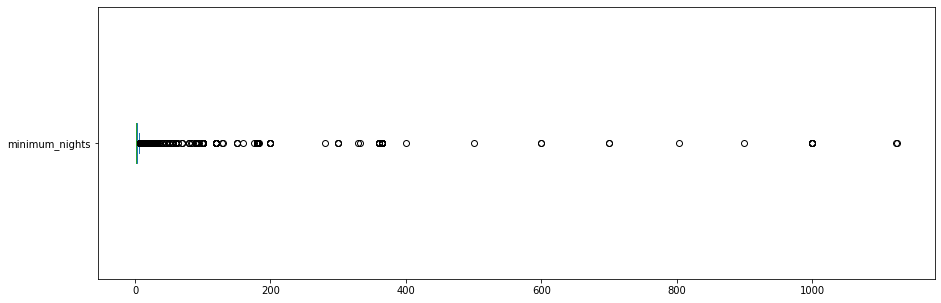

In [ ]:
df_melbourne['minimum_nights'].plot(kind='box',figsize=((15,5)),vert=False);

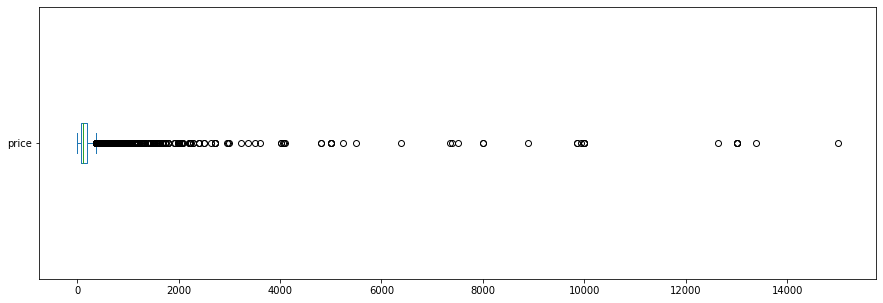

In [ ]:
df_melbourne['price'].plot(kind='box',figsize=((15,5)),vert=False);

####Removendo os outliers e valores nulos

#####Removendo os valores nulos

In [ ]:
df_melbourne = df_melbourne.drop(df_melbourne[['license','neighbourhood_group']],axis=1)

df_melbourne.drop(df_melbourne.loc[df_melbourne['reviews_per_month'].isnull() == True].index, axis=0, inplace=True)
df_melbourne.head()


id                                    name  host_id     host_name  \
0   9835                  Beautiful Room & House    33057         Manju   
1  12936  St Kilda 1BR+BEACHSIDE+BALCONY+WIFI+AC    50121  The A2C Team   
2  33111     Million Dollar Views Over Melbourne   143550          Paul   
3  38271      Melbourne - Old Trafford Apartment   164193   Daryl & Dee   
4  41836       CLOSE TO CITY & MELBOURNE AIRPORT   182833         Diana   

  neighbourhood  latitude  longitude        room_type  price  minimum_nights  \
0    Manningham -37.77247  145.09232     Private room     60               1   
1  Port Phillip -37.85999  144.97662  Entire home/apt     95               3   
2     Melbourne -37.82163  144.96672     Private room   1000               1   
3         Casey -38.05725  145.33936  Entire home/apt    111               1   
4       Darebin -37.69729  145.00082     Private room     40               7   

   number_of_reviews last_review  reviews_per_month  \
0                  4  2015-09-12               0.03   
1                 42  2020-03-15               0.30   
2                  2  2012-01-27               0.02   
3                167  2021-11-27               1.24   
4                159  2018-08-22               1.18   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  
0                               1               365                      0  
1                              10                 0                      0  
2                               1               365                      0  
3                               1               288                     16  
4                               2                 0                      0

#####Removendo os outliers
Para remover os outliers, vamos estipular um limite para cada variável.

Para **`minimum_nights`** será de 30 dias, pois estamos considerando que essas propriedades sejam para pessoas que estão realizando intercambio de 1 mês na cidade;

Para **`price`** vamos limitar até 1000 mil dólares, considerando que pode estar em um local de classe alta.

In [ ]:
df_melbourne_clean = df_melbourne.copy()

df_melbourne_clean.drop(df_melbourne_clean[df_melbourne_clean['minimum_nights']>30].index,axis=0, inplace=True)
df_melbourne_clean.drop(df_melbourne_clean[df_melbourne_clean['price']>1000].index,axis=0, inplace=True)


In [ ]:
df_melbourne_clean[['minimum_nights','price']].describe()

minimum_nights         price
count    13385.000000  13385.000000
mean         3.150467    155.675009
std          4.416701    130.792132
min          1.000000     14.000000
25%          1.000000     75.000000
50%          2.000000    120.000000
75%          3.000000    189.000000
max         30.000000   1000.000000

####Visualizando a distribuição após a remoção

In [ ]:
df_melbourne_clean.shape

(13385, 16)

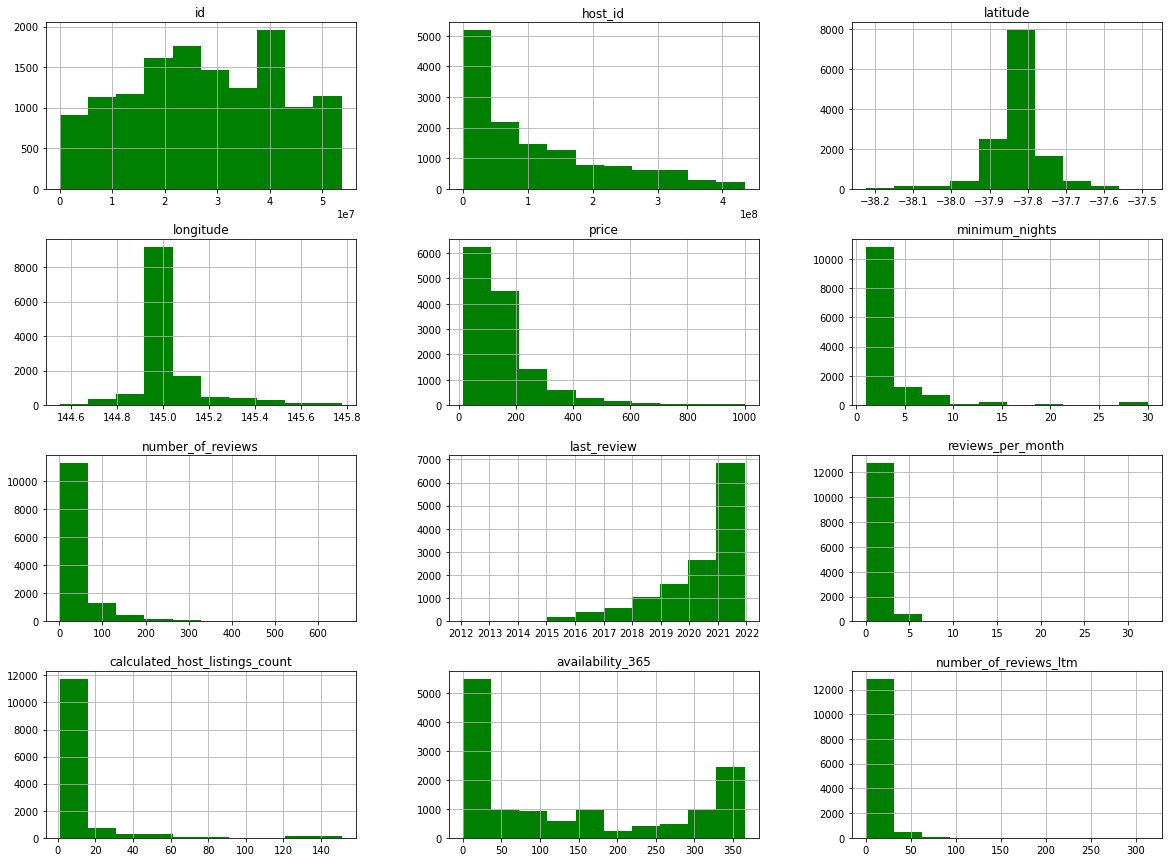

In [ ]:
df_melbourne_clean.hist(figsize=((20,15)),color='green');

#####Boxplot

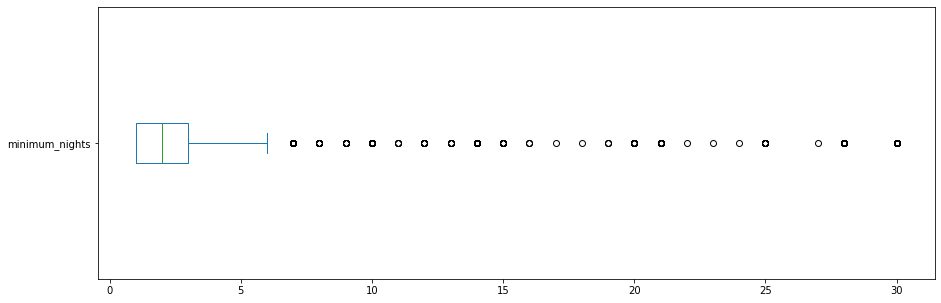

In [ ]:
df_melbourne_clean['minimum_nights'].plot(kind='box',figsize=((15,5)),vert=False);

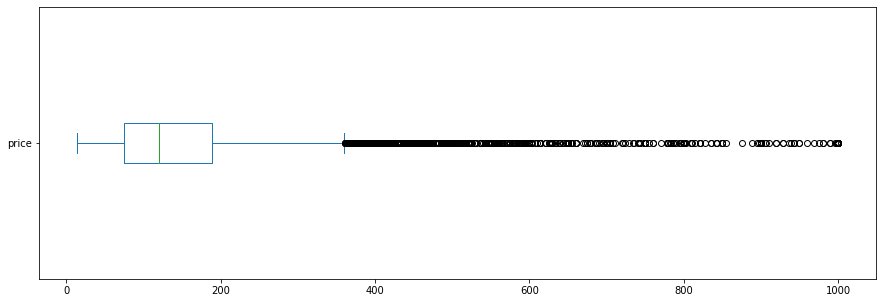

In [ ]:
df_melbourne_clean['price'].plot(kind='box',figsize=((15,5)),vert=False);

###Correlação entre as variaveis


A correlação é a medida que verifica o grau de intensidade que duas ou mais variáveis estão relacionadas.

Exemplo, temos as variáveis X e Y, se o valor de X aumentar e o de Y também, existe uma correlação positiva, caso o valor de X aumentar e o de Y diminuir, tem assim uma correlação negativa.

Devemos ter em mente que, [correlação não implica em causalidade](https://medium.com/@felipemaiapolo/correla%C3%A7%C3%A3o-n%C3%A3o-implica-em-causalidade-8459179ad1bc), pode-se encontrar alguns exemplos no site do livro [Spurious Correlations](https://www.tylervigen.com/spurious-correlations)

Para o cálculo da correlação, possuem diversas formulas e métodos, nessa análise sera abordado o método de Pearson.

#####Perguntas para correlação

Vamos elaborar questões para respondermos a partir da análise da correlação.

1. O preço e o mínimo de noites possuem alguma relação?
2. Quanto maior o número de  avaliações maior o preço?
3. Qual a relação entre o preço e a disponibilidade?


In [ ]:
df_melbourne_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

price  minimum_nights  number_of_reviews  \
price                           1.000000       -0.003567          -0.007920   
minimum_nights                 -0.003567        1.000000          -0.076444   
number_of_reviews              -0.007920       -0.076444           1.000000   
reviews_per_month               0.029224       -0.131278           0.707353   
calculated_host_listings_count  0.020648        0.023388          -0.055466   
availability_365                0.173616       -0.008168           0.105581   

                                reviews_per_month  \
price                                    0.029224   
minimum_nights                          -0.131278   
number_of_reviews                        0.707353   
reviews_per_month                        1.000000   
calculated_host_listings_count           0.005746   
availability_365                         0.136662   

                                calculated_host_listings_count  \
price                                                 0.020648   
minimum_nights                                        0.023388   
number_of_reviews                                    -0.055466   
reviews_per_month                                     0.005746   
calculated_host_listings_count                        1.000000   
availability_365                                      0.229760   

                                availability_365  
price                                   0.173616  
minimum_nights                         -0.008168  
number_of_reviews                       0.105581  
reviews_per_month                       0.136662  
calculated_host_listings_count          0.229760  
availability_365                        1.000000

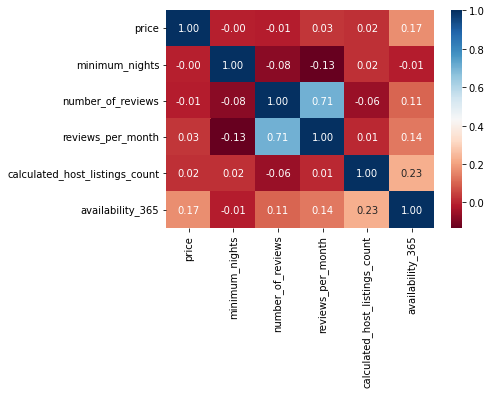

In [ ]:
corr = df_melbourne_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=False, linecolor='white', annot=True);

A partir dos dados obtidos no heatmap de correlação, podemos responder às questões elaboradas anteriormente.

1. O preço e o mínimo de noites não possuem nenhuma relação;
2. Não;
3. Possuem uma correlação positiva, porém bem fraca; 

###Tipo de hospedagem


In [ ]:
print(df_melbourne_clean['room_type'].value_counts())

df_melbourne_clean['room_type'].value_counts() /df_melbourne_clean.shape[0]

Entire home/apt    9188
Private room       3929
Shared room         158
Hotel room          110
Name: room_type, dtype: int64


Entire home/apt    0.686440
Private room       0.293538
Shared room        0.011804
Hotel room         0.008218
Name: room_type, dtype: float64

O tipo de propriedades mais comum em Melbourne são casas/apartamentos com 68% dos dados e salas privativas com 29%.

###Conhecendo os bairros
Vimos como os dados estão distribuídos e relacionados, agora vamos dar um foco nas localidades, como estão distribuídas pela cidade, os valores mais altos e entender se correspondem ou não com a situação atual.


####Qual a localidade com o valor mais alto?



In [ ]:
df_melbourne_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Yarra Ranges    282.422914
Bayside         262.119469
Nillumbik       196.857143
Cardinia        192.680672
Kingston        179.417143
Frankston       176.088000
Port Phillip    161.692357
Hobsons Bay     159.346154
Manningham      156.710227
Yarra           156.141450
Name: price, dtype: float64

Os 3 bairros que possuem a maior média de preço são: Yarra Ranges, Bayside, Nillumbik.

Vamos conhecer melhor cada um deles e ver se condiz em ser os 3 mais caros de Melbourne.

**Yarra Ranges**
Imagem 

Fica localizado ao leste de Melbourne que incluem os subúrbios de Belgrave, Chirnside Park e Coldstream possuindo assim comunidades urbanas e rurais.

Yarra Ranges cobre cerca de 2.500 KM² e a cada ano recebe mais de 2 milhões de turistas visitando o Parque Nacional de Yarra Ranges, vinícolas, o museu publico TarraWarra of Art entre outros.

Bayside
Imagem 

Bayside esta localizada a sudeste do centro de Melbourne incluindo os subúrbios de Brighton, Beaumaris e Sandringham. Como pontos turísticos possuem algumas das melhores praias de Melbourne clubes esportivos e eventos comunitários.

Nillumbik imagem

Nillumbik está localizado a menos de 25 km a nordeste de Melbourne e possui uma extensão de 431 KM², incluindo os subúrbios de Diamond Creek, Plenty e Kangaroo Ground. Possui muita área de mata e atrações como o festival de artes de Montsalvat, aldeias e a colonia de artista mais antiga da Austrália.

In [ ]:
mapa = folium.Map(location=[-37.8140000,144.9633200])

coordenadas_bayside = df_melbourne_clean.loc[df_melbourne_clean['neighbourhood'] == 'Bayside'][['latitude','longitude']].values.tolist()
coordenadas_yarra_ranges = df_melbourne_clean.loc[df_melbourne_clean['neighbourhood'] == 'Yarra Ranges'][['latitude','longitude']].values.tolist()
coordenadas_nillumbik = df_melbourne_clean.loc[df_melbourne_clean['neighbourhood'] == 'Nillumbik'][['latitude','longitude']].values.tolist()


for lat,lng in coordenadas_bayside:
  mapa.add_child(folium.CircleMarker(location=[lat,lng],color='red',radius=3,fill=True,fill_opacity=1.0))

for lat,lng in coordenadas_yarra_ranges:
  mapa.add_child(folium.CircleMarker(location=[lat,lng],color='blue',radius=3,fill=True,fill_opacity=1.0))

for lat,lng in coordenadas_nillumbik:
  mapa.add_child(folium.CircleMarker(location=[lat,lng],color='green',radius=3,fill=True,fill_opacity=1.0))

mapa

####Localidade mais popular

In [ ]:
df_melbourne_clean['neighbourhood'].value_counts().sort_values(ascending=False)

Melbourne            4089
Port Phillip         1570
Yarra                1117
Stonnington           895
Yarra Ranges          707
Moreland              548
Darebin               396
Monash                363
Boroondara            348
Glen Eira             342
Whitehorse            326
Maribyrnong           300
Wyndham               292
Bayside               226
Moonee Valley         209
Manningham            176
Kingston              175
Hobsons Bay           156
Banyule               143
Frankston             125
Cardinia              119
Casey                 110
Knox                  107
Hume                  106
Brimbank               91
Greater Dandenong      81
Whittlesea             81
Maroondah              64
Nillumbik              63
Melton                 60
Name: neighbourhood, dtype: int64

In [ ]:
#Media de precos da cidade de Melbourne
media_preco_melbourne_city = df_melbourne_clean.loc[df_melbourne_clean['neighbourhood'] == 'Melbourne'].price.mean()
#Media de noites da cidade de Melbourne
minimo_noites_melbourne_city = df_melbourne_clean.loc[df_melbourne_clean['neighbourhood'] == 'Melbourne'].minimum_nights.mean()
print('Média de preço em Melbourne city: ',media_preco_melbourne_city)
print('Mínimo de noites em Melbourne city: ',minimo_noites_melbourne_city)

Média de preço em Melbourne city:  155.10173636585964
Mínimo de noites em Melbourne city:  2.982636341403766


Os 3 bairros com mais anúncios são: Melbourne, Port Phillip, Yarra.

Melbourne

A cidade de Melbourne é o centro empresarial e comercial de Victoria. Recebem cerca de mais de 850 mil pessoas diariamente e mais de 1 milhão ao ano. Melbourne é uma das áreas mais multinacionais de Victoria. Possui diversos pontos turísticos, museus, galerias e universidades.

Port Phillip

Está localizada ao sul de Melbourne e abrange a Baía de Port Phillip. Contempla diversas atrações noturnas e gastronômicas mais elegantes de Melbourne.

Yarra

A cidade de Yarra esta localizada ao lado nordeste da Cidade de Melbourne, possui uma boa qualidade de vida e para o lazer o Yarra Bend Park, Victoria Park Football Ground. A câmara municipal de Yarra tem um orçamento capital de 162,5 milhões usado para manter a infraestrutura e os serviços comunitários essenciais.


In [ ]:
mapa = folium.Map(location=[-37.8140000,144.9633200])

coordenadas_melbourne = df_melbourne_clean.loc[df_melbourne_clean['neighbourhood'] == 'Melbourne'][['latitude','longitude']].values.tolist()
coordenadas_port_phillip = df_melbourne_clean.loc[df_melbourne_clean['neighbourhood'] == 'Port Phillip'][['latitude','longitude']].values.tolist()
coordenadas_yarra = df_melbourne_clean.loc[df_melbourne_clean['neighbourhood'] == 'Yarra'][['latitude','longitude']].values.tolist()


for lat,lng in coordenadas_melbourne:
  mapa.add_child(folium.CircleMarker(location=[lat,lng],color='red',radius=3,fill=True,fill_opacity=1.0))

for lat,lng in coordenadas_port_phillip:
  mapa.add_child(folium.CircleMarker(location=[lat,lng],color='blue',radius=3,fill=True,fill_opacity=1.0))

for lat,lng in coordenadas_yarra:
  mapa.add_child(folium.CircleMarker(location=[lat,lng],color='green',radius=3,fill=True,fill_opacity=1.0))
  
mapa

Distribuição dos dados em Latitude e Longitude

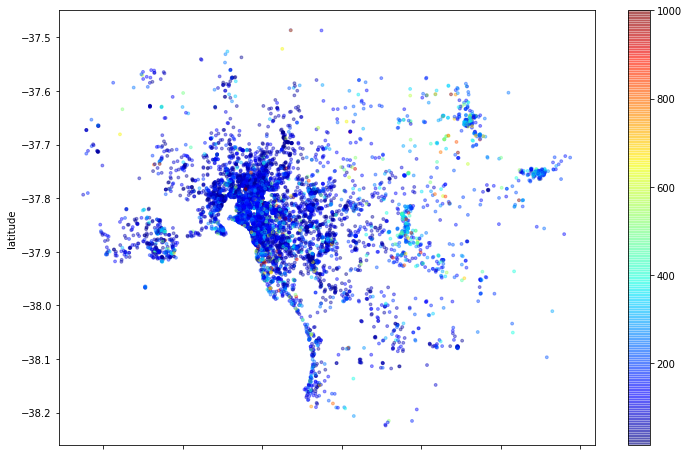

In [ ]:
df_melbourne_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_melbourne_clean['price'], s=8,cmap=plt.get_cmap('jet'), figsize=(12,8));

#Conclusão

Melbourne é o destino perfeito para quem deseja conhecer mais sobre a cultura e as origens do país desfrutando em simultâneo, de uma vida intensa e agitada com diversos pontos turísticos. Os bairros mais procurados estão localizados no centro da cidade Melbourne, e em média o custo para hospedagem é de $155 dólares o dia com tempo mínimo de 3 noites.

No que se refere à análise, vimos que, com uma exploração inicial é possível entender como os dados estão distribuídos, se o conjunto possui valores ausentes ou que fogem do padrão, iniciando  uma linha de raciocínio. Para os resultados obtidos, devemos considerar os limites utilizados na limpeza dos dados, pois se utilizado outros valores provavelmente as informações apresentadas seriam diferentes.


---

[LinkedIn](https://www.linkedin.com/in/joao-vitor-maximo/)

[Github](https://github.com/joaomxm)